In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
#path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe
path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [4]:
with open(path+"data_for_training/v2/collisions_1hot.pkl", 'rb') as infile:
    df = pickle.load(infile)

In [7]:
df = df.drop(['injured', 'killed'], axis=1)
df = df.sort_values('date_time')

view_date = pd.to_datetime(df['date_time'])

train_indices = (0, np.sum(view_date < datetime.date(2015,9,12))-1)
val_indices = (train_indices[1]+1,\
               train_indices[1] + \
               np.sum((view_date >= datetime.date(2015,9,12)) & (view_date < datetime.date(2016,7,31))))
test_indices = (val_indices[1]+1,\
               val_indices[1] + np.sum(view_date >= datetime.date(2016,7,31)))

In [8]:
X_train = df.drop(['injured_or_killed'], axis=1).iloc[train_indices[0]:train_indices[1]]
y_train = df['injured_or_killed'].iloc[train_indices[0]:train_indices[1]]
X_val = df.drop(['injured_or_killed'], axis=1).iloc[val_indices[0]:val_indices[1]]
y_val = df['injured_or_killed'][val_indices[0]:val_indices[1]]
X_test = df.drop(['injured_or_killed'], axis=1).iloc[test_indices[0]:test_indices[1]]
y_test = df['injured_or_killed'][test_indices[0]:test_indices[1]]

In [11]:
df['date_time'] = pd.to_datetime(df.date_time).dt.date

In [12]:
df

,date_time,zip_code,latitude,longitude,uber_count_0.003,temperature,heat_index,dew_point,humidity,pressure,...,conditions_light_rain,conditions_light_snow,conditions_mostly_cloudy,conditions_overcast,conditions_partly_cloudy,conditions_rain,conditions_scattered_clouds,conditions_snow,conditions_thunderstorm,conditions_thunderstorms_and_rain
858743,2012-07-01,10036.0,40.762127,-73.997387,48.000000,79.0,44.947843,63.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
922936,2012-07-01,11207.0,40.697753,-73.813916,0.000000,80.1,81.700000,64.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
858745,2012-07-01,11207.0,40.733610,-73.923840,0.000000,82.0,83.400000,64.0,54.0,54.0,...,0,0,0,0,0,0,0,0,0,0
858744,2012-07-01,11223.0,40.588868,-73.972745,2.000000,80.1,81.700000,64.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
975542,2012-07-01,11215.0,40.677406,-73.983048,23.000000,79.0,44.947843,63.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
926608,2012-07-01,11207.0,40.721841,-73.921024,16.665826,79.0,44.947843,63.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
858746,2012-07-01,10451.0,40.824188,-73.913840,0.000000,82.0,83.400000,64.0,54.0,54.0,...,0,0,0,0,0,0,0,0,0,0
858747,2012-07-01,11234.0,40.607179,-73.916414,0.000000,80.1,81.700000,64.0,58.0,58.0,...,0,0,0,0,0,0,0,0,0,0
858748,2012-07-01,11375.0,40.732979,-73.844348,0.000000,82.0,83.400000,64.0,54.0,54.0,...,0,0,0,0,0,0,0,0,0,0
858749,2012-07-01,11233.0,40.670118,-73.922467,0.000000,82.0,83.400000,64.0,54.0,54.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
sums = pd.DataFrame(df.groupby('date_time')['injured_or_killed'].sum())
sums.reset_index(inplace=True)
sums.date_time = pd.to_datetime(sums.date_time)
sums.set_index('date_time', inplace=True)
sums.rename(columns={'injured_or_killed': 'sum'}, inplace = True)

counts = pd.DataFrame(df.groupby('date_time')['injured_or_killed'].count())
counts.reset_index(inplace=True)
counts.date_time = pd.to_datetime(counts.date_time)
counts.set_index('date_time', inplace=True)
counts.rename(columns={'injured_or_killed': 'total'}, inplace = True)

macro = sums.join(counts)

In [83]:
macro['injury_killed_rate'] = macro['sum']/macro['total']

In [69]:
import calmap

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


(<matplotlib.figure.Figure at 0x13ca206a0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4b78cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2d71b38>], dtype=object))

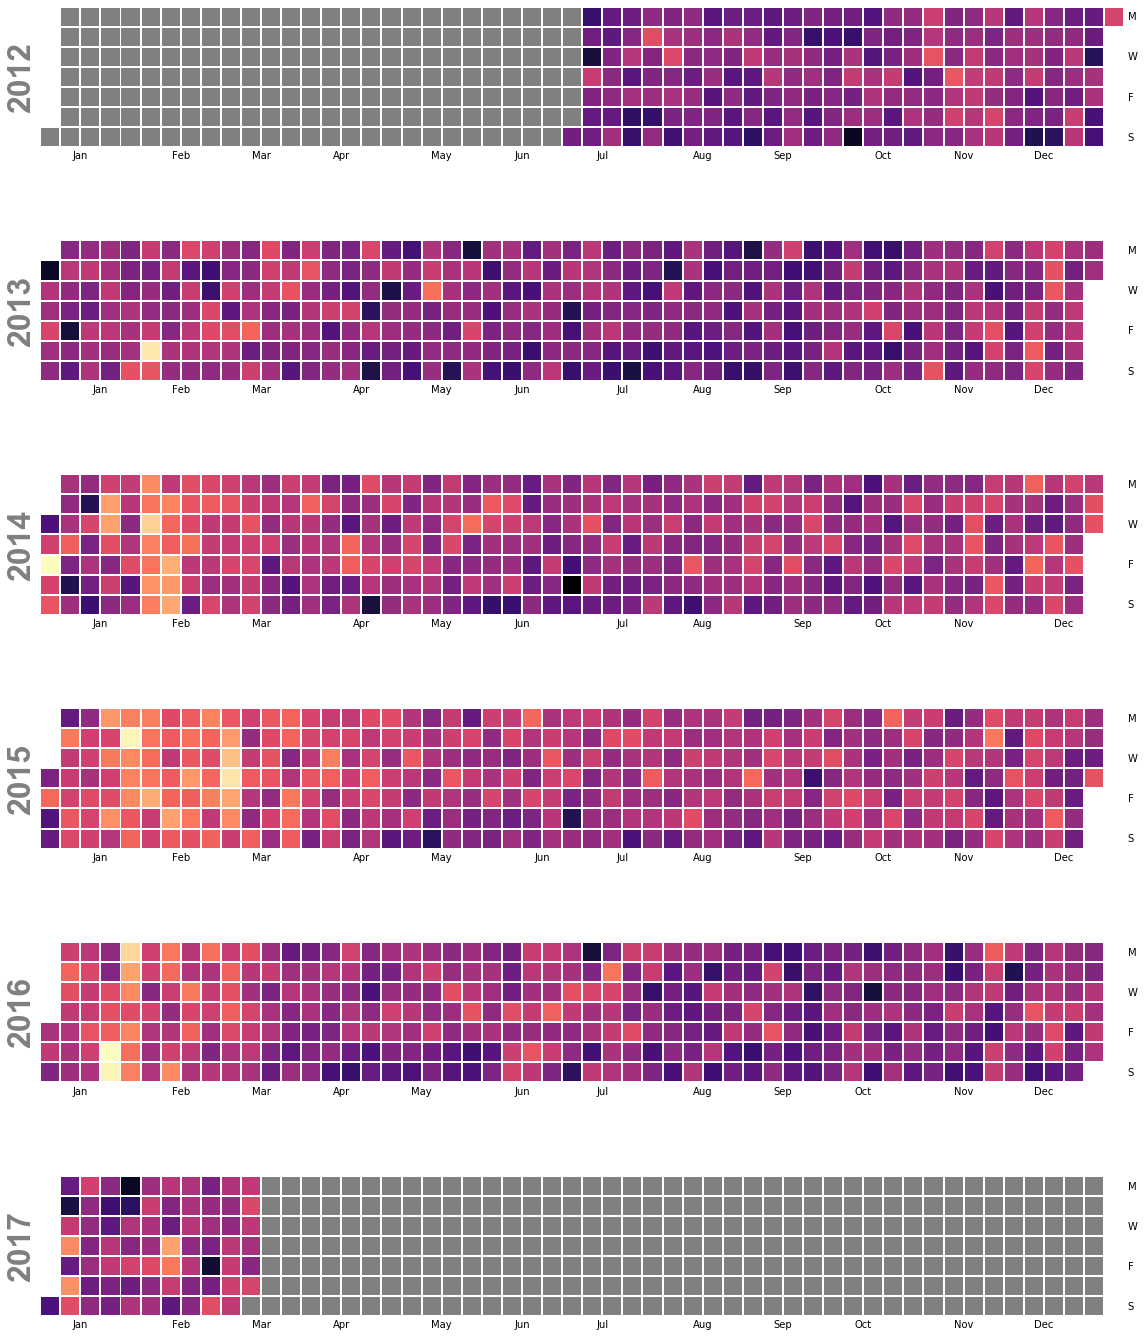

In [85]:
calmap.calendarplot(macro['injury_killed_rate'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, fillcolor='grey', cmap = 'magma_r')

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


(<matplotlib.figure.Figure at 0x13cac2898>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d80048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a370f3c8>], dtype=object))

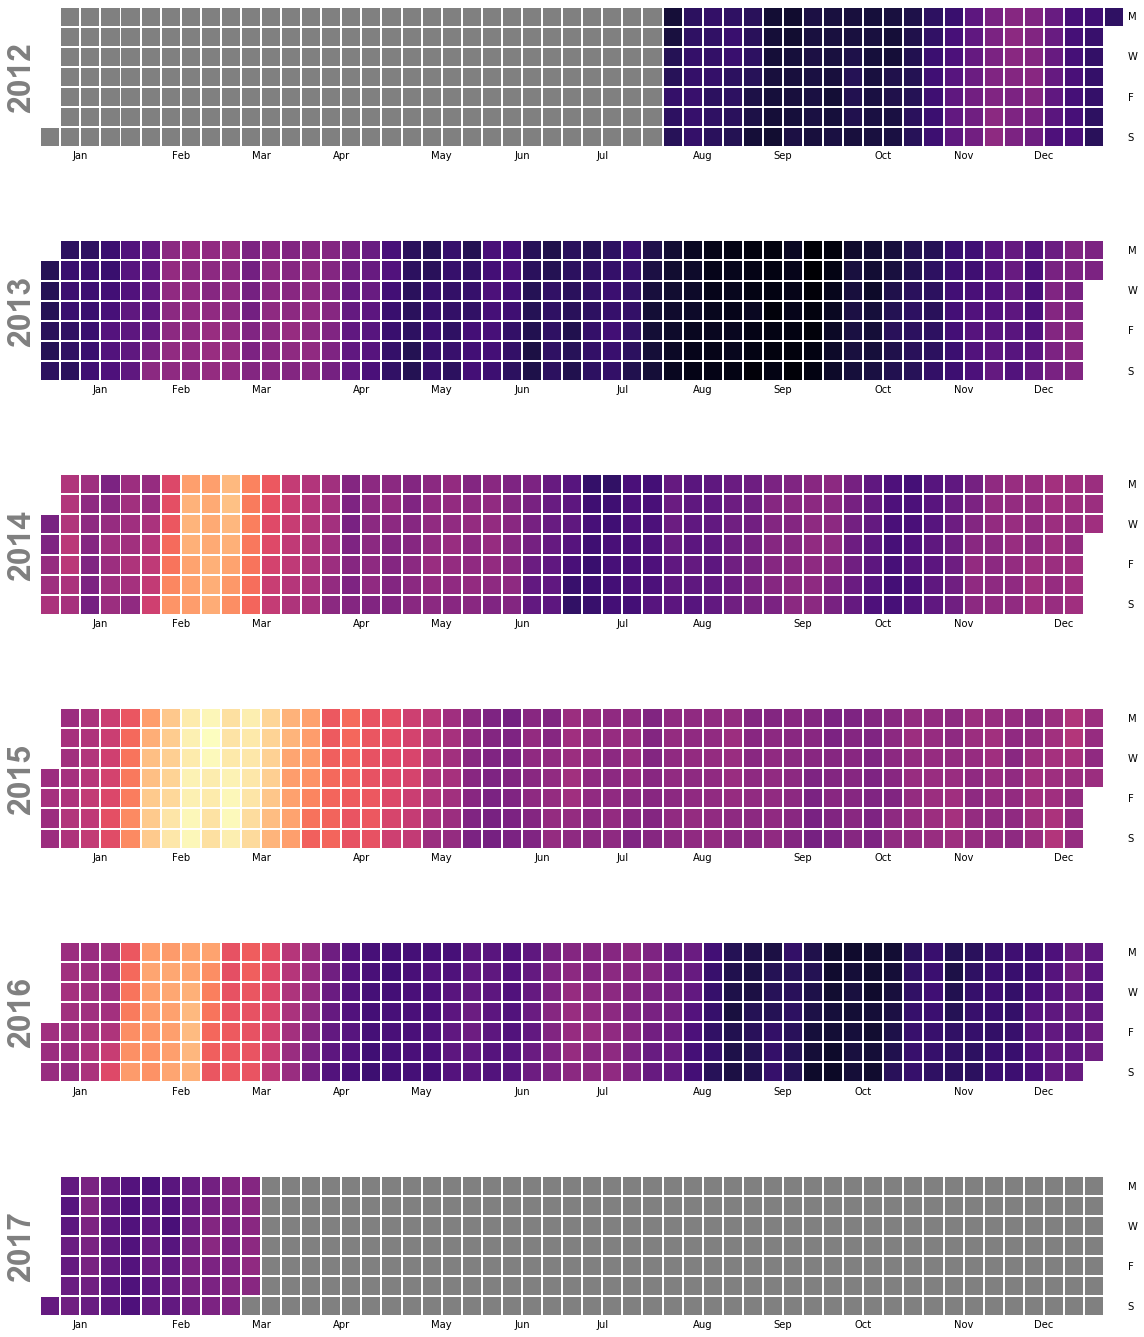

In [89]:
macro['rolling'] = macro.injury_killed_rate.rolling(30).mean()
calmap.calendarplot(macro['rolling'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, fillcolor='grey', cmap = 'magma_r')

In [94]:
macro.loc['2015-02-20']

sum                    90.000000
total                 621.000000
injury_killed_rate      0.144928
rolling                 0.140579
Name: 2015-02-20 00:00:00, dtype: float64

In [96]:
macro.loc['2013-08-20']

sum                   125.000000
total                 542.000000
injury_killed_rate      0.230627
rolling                 0.211168
Name: 2013-08-20 00:00:00, dtype: float64